In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

# Exercise 15.6

Fit a series of random-forest classifiers to the spam data, to explore
the sensitivity to the parameter m. Plot both the oob error as well as the
test error against a suitably chosen range of values for m.

# Solution

Let's collect the data,

In [2]:
url_link = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.data'
df = pd.read_csv(url_link,sep=' ',header=None)

df.tail()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [3]:
y = df.pop(57).to_numpy()
X = df.to_numpy()

N,p = X.shape
test_split = .3
N_train = int(N*(1-test_split))

# Train set
X_train = X[:N_train]
y_train = y[:N_train]

# Test set
X_test = X[N_train:]
y_test = y[N_train:]

### Fitting a random forest

In [4]:
# List of possible number of features to consider for a split in each tree of the forest
m_list = np.arange(1,p,3,dtype=int)

oob_error = []
test_error = []

for m in m_list:

    model = RandomForestClassifier(n_estimators=100, # Number of trees in the forest
                                   max_features=m, # Number of feature to consider at each split
                                   bootstrap=True, # Build the trees on bootstrap samples
                                   oob_score=True, # Compute out of bag score
                                   random_state=140590,
                                   max_samples=N_train # size of each bootstrap sample
                                  )
    
    model.fit(X_train,y_train)
    
    # Out of bag error
    oob_error.append(1-model.oob_score_)
    
    # Test error
    test_error.append(1-model.score(X_test,y_test))

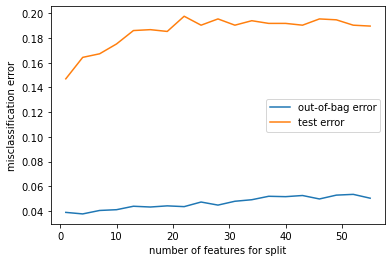

In [5]:
plt.errorbar(m_list,oob_error,label='out-of-bag error')
plt.errorbar(m_list,test_error,label='test error')
plt.xlabel('number of features for split')
plt.ylabel('misclassification error')
plt.legend()
plt.show()